In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load House Price data 
df = pd.read_csv('house-price-train.csv')

In [3]:
#Print first few rows of df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Print df's Shape
df.shape

(1460, 81)

In [5]:
## print the df's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
## check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

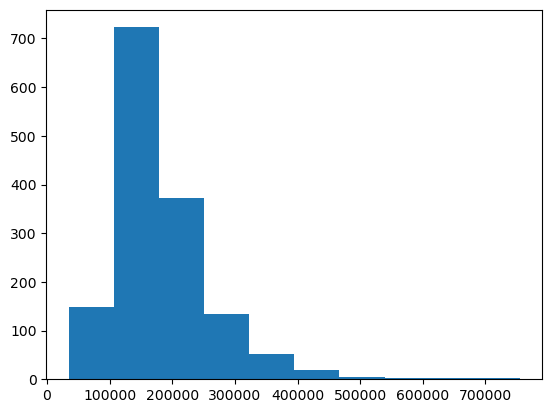

In [7]:
#Visualize the distribution of a numeric column
plt.hist(df['SalePrice'])
plt.show()

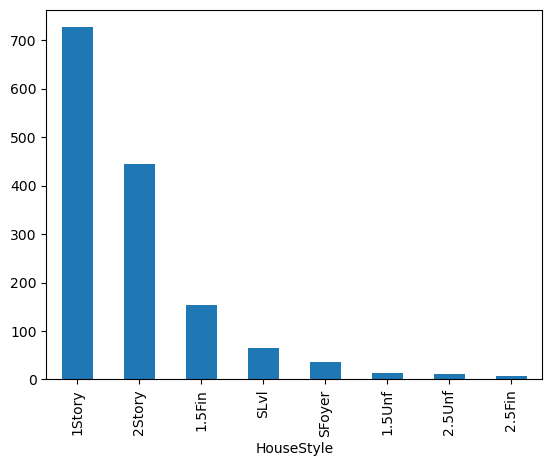

In [8]:
#visualize the distribution of a categorical column
df['HouseStyle'].value_counts().plot(kind='bar')
plt.show()

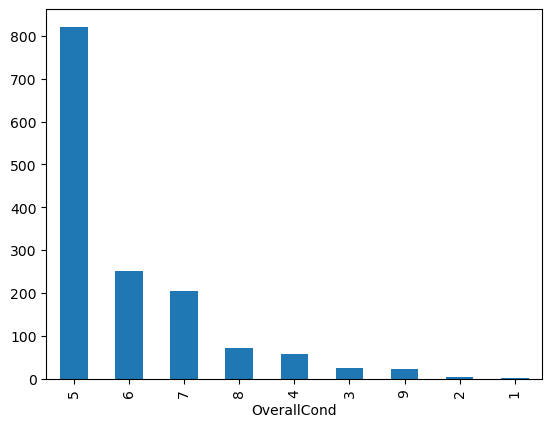

In [9]:
#visualize the distribution of a categorical column
df['OverallCond'].value_counts().plot(kind='bar')
plt.show()

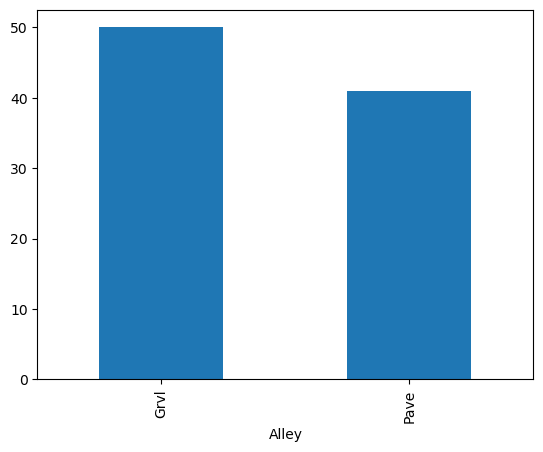

In [10]:
#visualize the distribution of a categorical column
df['Alley'].value_counts().plot(kind='bar')
plt.show()

In [11]:
## calculate basic statistics for a numeric column
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [12]:
print(df['LotArea'].corr(df['SalePrice']))

0.26384335387140556


In [13]:
#group the data by a categorical column and calculate statistics
grouped_df = df.groupby('OverallCond')['SalePrice'].mean()
print(grouped_df)

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64


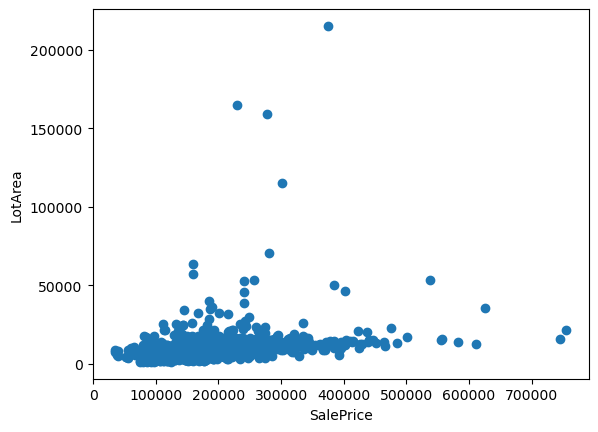

In [14]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['SalePrice'], df['LotArea'])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

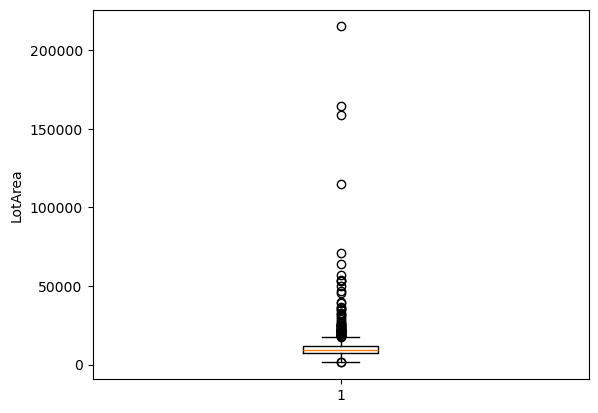

In [15]:
## create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['LotArea'])
plt.ylabel('LotArea')
plt.show()

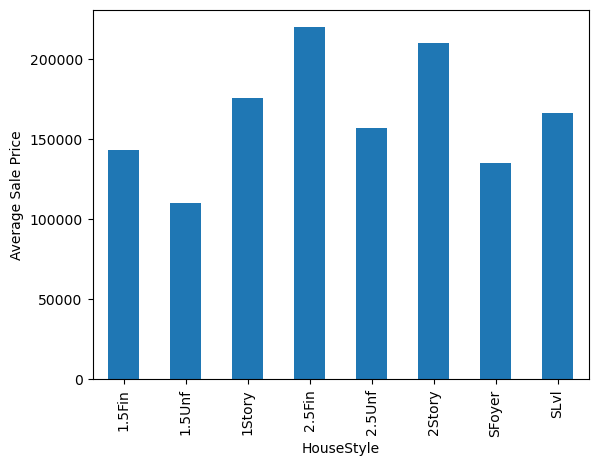

In [16]:
df.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.show()

In [17]:
## create a pivot table to summarize the data
## Question: For each house style, what is the average price by year sold
pivot_table = df.pivot_table(index='YrSold', columns='HouseStyle', values='SalePrice', aggfunc='mean')
print(pivot_table)

HouseStyle         1.5Fin         1.5Unf         1Story         2.5Fin  \
YrSold                                                                   
2006        132323.529412  113000.000000  176085.668874  296750.000000   
2007        155583.928571  111442.857143  178610.035928  200000.000000   
2008        156048.162162  111000.000000  170431.938356  221833.333333   
2009        133747.948718  105333.333333  177611.275449  150500.000000   
2010        137167.250000            NaN  176889.463158            NaN   

HouseStyle         2.5Unf         2Story         SFoyer           SLvl  
YrSold                                                                  
2006        153500.000000  216205.089109  129495.000000  156428.000000  
2007        130225.000000  222422.737374  133944.444444  164585.714286  
2008        194166.666667  201320.554348  142431.800000  163080.000000  
2009        160250.000000  206467.264706  135793.000000  182250.000000  
2010                  NaN  196770.941176  1

C:\Users\henry\AppData\Local\Temp\ipykernel_33832\103563564.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


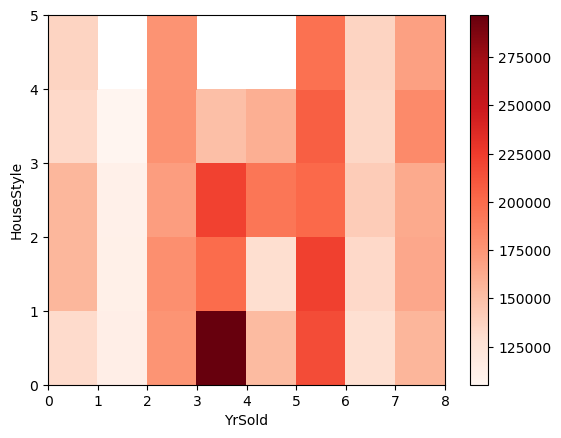

In [18]:
## create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.xlabel('YrSold')
plt.ylabel('HouseStyle')
plt.show()

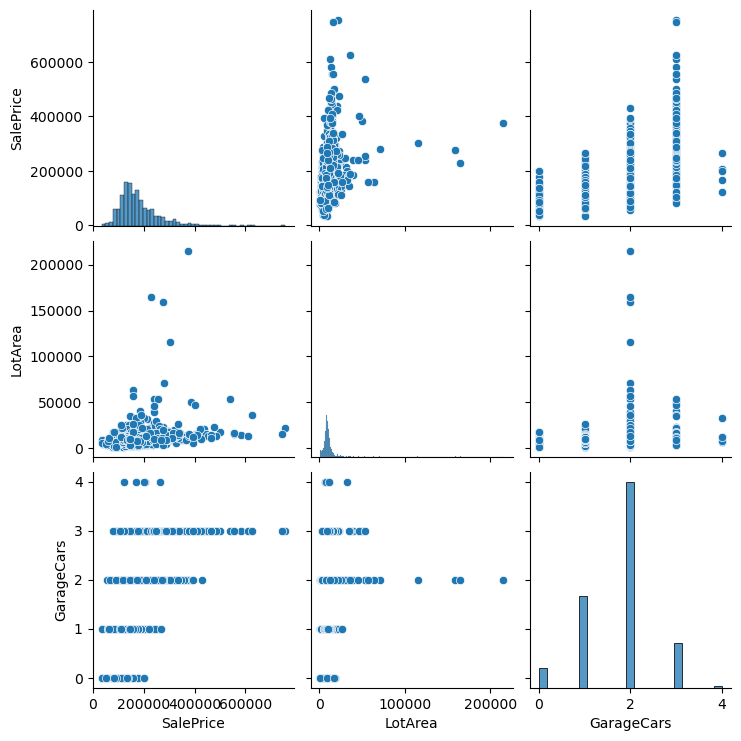

In [19]:
## create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['SalePrice', 'LotArea', 'GarageCars'])
plt.show()

In [20]:
#pip install autoviz

In [21]:
from autoviz import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [22]:
df_AV = AV.AutoViz(df)

Shape of your Data Set loaded: (1460, 81)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  32
    Number of String-Categorical Columns =  37
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  2
    Number of ID Columns =  1
    Number of Columns to Delete =  3
    81 Predictors classified...
        4 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Id', 'Alley', 'PoolQC', 'MiscFeature']
3 numeric variables in da

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Id,int64,0.000000,100,1.000000,1460.000000,Possible ID column: drop before modeling step.
MSSubClass,int64,0.000000,1,20.000000,190.000000,Column has 103 outliers greater than upper bound (145.00) or lower than lower bound(-55.00). Cap them or remove them.
MSZoning,object,0.000000,0,,,1 rare categories: ['C (all)']. Group them into a single category or drop the categories.
LotFrontage,float64,17.739726,NA,21.000000,313.000000,"259 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 88 outliers greater than upper bound (111.50) or lower than lower bound(27.50). Cap them or remove them."
LotArea,int64,0.000000,73,1300.000000,215245.000000,Column has 69 outliers greater than upper bound (17673.50) or lower than lower bound(1481.50). Cap them or remove them.
Street,object,0.000000,0,,,No issue
Alley,object,93.767123,0,,,"Possible Zero-variance or low information colum: drop before modeling step., 1369 missing values. Impute them with mean, median, mode, or a constant value such as 123."
LotShape,object,0.000000,0,,,1 rare categories: ['IR3']. Group them into a single category or drop the categories.
LandContour,object,0.000000,0,,,No issue
Utilities,object,0.000000,0,,,No issue


Number of All Scatter Plots = 6
All Plots done
Time to run AutoViz = 32 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [23]:
## Data Preprocessing

In [24]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [25]:
#drop LotFrontage - highly correlated with Lot Area but contains missing values
# calculate the correlation between two numeric columns
print(df_preprocessed['LotFrontage'].corr(df_preprocessed['LotArea']))

0.4260950187718077


In [26]:
df_preprocessed.drop('LotFrontage', axis=1, inplace=True)

In [27]:
na_percentages = df_preprocessed.isnull().mean() * 100
filtered_na_percentages = na_percentages[na_percentages > 0]  # Filter for columns with > 0% missing values
print(filtered_na_percentages)

Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [28]:
#drop high missing value columns
df_dropped_columns = df_preprocessed.drop(columns = ['Alley','MasVnrType','PoolQC','Fence','MiscFeature','FireplaceQu'])

In [29]:
#drop rows with nan
df_dropped_columns.dropna(inplace=True)
print(df_dropped_columns.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [30]:
df_no_missing_value = df_dropped_columns
print(df_no_missing_value.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1      60        RL       8450   Pave     Reg        Lvl      AllPub    
1   2      20        RL       9600   Pave     Reg        Lvl      AllPub    
2   3      60        RL      11250   Pave     IR1        Lvl      AllPub    
3   4      70        RL       9550   Pave     IR1        Lvl      AllPub    
4   5      60        RL      14260   Pave     IR1        Lvl      AllPub    

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0   Inside      Gtl      CollgCr       Norm      Norm      1Fam     2Story     
1      FR2      Gtl      Veenker      Feedr      Norm      1Fam     1Story     
2   Inside      Gtl      CollgCr       Norm      Norm      1Fam     2Story     
3   Corner      Gtl      Crawfor       Norm      Norm      1Fam     2Story     
4      FR2      Gtl      NoRidge       Norm      Norm      1Fam     2Story     

   OverallQual  OverallCond  YearBuilt  YearRemodAdd Roo

In [31]:
# calculate summary statistics for a numeric column
print(df_no_missing_value['LotArea'].describe())

count      1338.000000
mean      10706.294469
std       10336.621126
min        1300.000000
25%        7744.000000
50%        9600.000000
75%       11760.750000
max      215245.000000
Name: LotArea, dtype: float64


In [32]:
# calculate the skewness and kurtosis of a numeric column
print(df_no_missing_value['LotArea'].skew())
print(df_no_missing_value['LotArea'].kurtosis())

11.938123813941802
191.84425775325727


In [33]:
def remove_outliers_iqr(df_no_missing_value, columns):
    for col in columns:
        Q1 = df_no_missing_value[col].quantile(0.25)  # 25th percentile
        Q3 = df_no_missing_value[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                # Interquartile range
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to exclude outliers
        df_no_missing_value = df_no_missing_value[(df_no_missing_value[col] >= lower_bound) & (df_no_missing_value[col] <= upper_bound)]
    
    return df_no_missing_value

In [34]:
Outlier_columns = [
    'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'SalePrice'
]


In [35]:
# Apply the function to your DataFrame
df_no_outliers = remove_outliers_iqr(df_no_missing_value, Outlier_columns)

In [36]:
## print the df's data types - use business knowledge to remove columns
print(df_no_outliers.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [38]:
#most columns dropped due to excess data / likely not important for decision-making when buying a home
df_no_outliers.drop(columns=[
    "Id", "LotShape", "LandContour", "OverallQual", "RoofStyle", "ExterQual", 
    "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", 
    "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "GrLivArea", "BedroomAbvGr", 
    "Fireplaces", "GarageFinish", "GarageQual", "MoSold"
], inplace=True)


In [ ]:
#Encode categorical variables using one-hot encoding
#Detect non-numeric columns
non_numeric_columns = df_no_outliers.select_dtypes(include=['object', 'category']).columns

#One-hot encode non-numeric columns
encoded_df = pd.get_dummies(df_no_outliers, columns=non_numeric_columns, drop_first=True)

#compare outputs to comfirm one-hot encoding successful
print("Original DataFrame:")
print(df_no_outliers)
print("\nOne-hot Encoded DataFrame:")
print(encoded_df)

In [ ]:
#check that all columns are numeric
encoded_df.head()

In [ ]:
correlation_matrix = encoded_df.corr()

#create a binary correlation matirx based on threshold
correlation_matrix.abs() > 0.6
#any columns with correlation will show up as "True" 
#at least one column for every true should be dropped